# Tutorial 5: Reliability and Validity of Questionnaires
**Date**: March 2022

**Background**

In the last tutorial you learned how to to measure tolerance and follow the various steps needed to analyze a questionnaire in Python. You also worked on previous python steps such as how to import survey data into pandas, analyze the datatypes, transform the data for quantitative processing and handle missing values. This tutorial also gave us practice in using python functions - `dtypes()` to check variables' type, `value_counts()` to explore percentages in tolerance questions and `fillna()` to handle missing data.


Today tutorial, we will focus on a case-study to measure tolerance and follow the various steps and techniques needed to produce a simple and commonly used measure of reliability: **Cronbach's alpha**. 


**Goal of the Case-Study**

The goal of this case-study is examine student's attitudes towards tolerance where tolerance refers to the degree of diversity. They developed a questionnaire focusing on the **three** different factors of tolerance based on [1] theoretical framework:


<p align=\"center\"><img src='../tutorial4/images/items.png' width="1000" /></p>


**Dataset and theoretical framework**

For this tutorial, we will be using the **transformed version** of "tolerance survey dataset" from the previous tutorial. After removing other variables, this dataset has 8 variables that we be used to measure tolerance. These 8 variables are divided into three set of 3(or 2) variables and each one deals with different factors of tolerance such as "**1-Acceptance**" "**2-Respect**" and "**3-Appreciation**" towards **diversity**. To measure this construct, several Likert-Type items were added onto the questionnarie. So we're working with 8 variables which are displayed in Table 1:

**Table 1**. Factors of the theoretical construct and items

|factors|variable   |description                                                                                                                                    |
|------|-----------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1- Acceptance     |q1         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [People should have the right to live how they wish]|
|1-Acceptance    |q2         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [It is important that people have the freedom to live their life as they choose]     |
|1- Acceptance   |q3         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [ It is okay for people to live as they wish as long as they do not harm other people]                                    |
|2- Respect    |q4         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s beliefs and opinions]        |
|2- Respect    |q5         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I respect other people’s opinions even when I do not agree]   |
|3-Appreciation  |q6         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like to spend time with people who are different from me]                                         |
|3-Appreciation    |q7         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [I like people who challenge me to think about the world in a different way]                            |
|3-Appreciation   |q8         |five-point Likert Scale from 'strongly disagree' to 'strongly agree': [Society benefits from a diversity of traditions and lifestyles]                            |


---
source: the authors [1]



**Today's Objectives**

After establishing the instrument's theoretical construct, its validation and reliability starts. Questionnarie validity and reliability is our main focus today.

In the subsequent exercises we will primarily focus on two statistical techniques to test the construct validity/reliability by:

 - exploring the relationship between variables computing the pearson correlation matrix. 
 - using Cronbach's Alpha to estimate the internal consistency or reliability of the variables that make up the tolerance measure based on the three composite measures. This is basically a question of reliability:

> **_Are the factors consistent in the sense that each one measures what it intents to measure?_**


---
[1] Hjerm, M., Eger, M. A., Bohman, A., & Fors Connolly, F. (2020). A new approach to the study of tolerance: Conceptualizing and measuring acceptance, respect, and appreciation of difference. Social Indicators Research, 147(3), 897-919.
Chicago

---



## 1. Setup Library



In [1]:
# exercice 1
# Import the necessary libraries you will need to perform such analysis on the survey data.

In [3]:
import pandas as pd

## 2. Import and prepare the Data 

We will be using the **transformed version** of "tolerance survey dataset" from the previous tutorial. For sake of simplicity, please run the following python code that transform the row data into todays data version.

In [4]:
#read the data into the dataframe and print the first 10 rows
url = 'https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester4/tutorial4/inputs/tolerance_survey_data.csv'
df = pd.read_csv(url)
# transform/prepare the data
df_transformed = df.replace(['Strongly Agree',
                   'Agree', 
                   'Neutral', 
                   'Disagree', 
                   'Strongly Disagree'], [5,4,3,2,1])

df_transformed = df_transformed.drop(['id','age','height','country','language','freq_travel'], axis=1)

In [ ]:
# exercice 2
# check the df_transformed type of each variable and shape

In [6]:
print(df_transformed.dtypes) # this exercice is to make sure all students
# work with correct data
print(df_transformed.shape)

q1    float64
q2      int64
q3    float64
q4    float64
q5      int64
q6    float64
q7    float64
q8    float64
dtype: object
(150, 8)


**Imputing missing values**

In previous tutorial, we found NA values. Now we need to replace the missing value (NaN) with the mean of that column.

In [7]:
# exercice 3: Compute the means of each colum 
#Hint use the mean() funtion on the dataframe
#Use the fillna() function to fill the missing (NaN) value with the mean

In [7]:
column_means = df_transformed.mean()
print(column_means)

q1    3.798658
q2    4.046667
q3    4.073826
q4    4.476510
q5    4.313333
q6    4.268456
q7    4.060403
q8    4.120805
dtype: float64


In [9]:
df_transformed_without_NaN = df_transformed.fillna(column_means)
df_transformed_without_NaN.head(10)

In [10]:
# change df name (not mandatory)
df_tutorial_5 = df_transformed_without_NaN

---


## Questionnarie validation/reliability

After establishing the questionnarie's theoretical construct based on [1] as indicated in Table 1, we need to start with validation and reliability step. Put simply, we want to address the following question:
   > **_Are the factors consistent in the sense that each one measures what it intents to measure?_**



### Validity test with correlation analysis

We want to produce some correlations, as this will give an
indication of whether the items are tapping into the same underlying concept.

If all of the items are measuring the same concept, we would expect them all to correlate well together. Any items that have consistently low correlations across the board may need to be removed from the dataframe to make it more reliable.

In order to assess construct validity, Pearson's correlation is utilized. Pearson's correlation is commonly used to verify the intensity of the existing linear association between variables. This coefficient is a number between −1 and 1 that expresses the degree of linear dependence between two quantitative variables. 
If negative, it indicates that one variable decreases as the other increases; if positive, it indicates that one variable increases as the other increases. 

**Pearson's Correlation Test with Python**

See [previous material](https://github.com/MaastrichtU-IDS/global-studies/blob/main/semester2/notebooks/3.2-NHST-advanced-with-python-solutions.ipynb) from last year about Pearson's correlation test, and how to perform using python.

In [11]:
# exercice 4: calculate the correlations between the variables

In [16]:
df_tutorial5.corr(method="pearson")

,q1,q2,q3,q4,q5,q6,q7,q8
q1,1.000000,0.503568,0.434025,0.209179,0.155458,0.147776,0.126557,0.067692
q2,0.503568,1.000000,0.484081,0.411058,0.377022,0.255870,0.173565,0.214375
q3,0.434025,0.484081,1.000000,0.338021,0.257888,0.304170,0.283716,0.297416
q4,0.209179,0.411058,0.338021,1.000000,0.526983,0.295219,0.224520,0.338423
q5,0.155458,0.377022,0.257888,0.526983,1.000000,0.175729,0.158038,0.145497
q6,0.147776,0.255870,0.304170,0.295219,0.175729,1.000000,0.474304,0.457530
q7,0.126557,0.173565,0.283716,0.224520,0.158038,0.474304,1.000000,0.503823
q8,0.067692,0.214375,0.297416,0.338423,0.145497,0.457530,0.503823,1.000000


In [18]:
#faster way with no packages as sns
df_tutorial5.corr().style.background_gradient(cmap="Blues")

,q1,q2,q3,q4,q5,q6,q7,q8
q1,1.000000,0.503568,0.434025,0.209179,0.155458,0.147776,0.126557,0.067692
q2,0.503568,1.000000,0.484081,0.411058,0.377022,0.255870,0.173565,0.214375
q3,0.434025,0.484081,1.000000,0.338021,0.257888,0.304170,0.283716,0.297416
q4,0.209179,0.411058,0.338021,1.000000,0.526983,0.295219,0.224520,0.338423
q5,0.155458,0.377022,0.257888,0.526983,1.000000,0.175729,0.158038,0.145497
q6,0.147776,0.255870,0.304170,0.295219,0.175729,1.000000,0.474304,0.457530
q7,0.126557,0.173565,0.283716,0.224520,0.158038,0.474304,1.000000,0.503823
q8,0.067692,0.214375,0.297416,0.338423,0.145497,0.457530,0.503823,1.000000


**Exercice: What does this matrix tell you?**

Sol: You’ll notice that the columns/variables of our dataframe are represented using both rows and columns. The row-column intersection represents the coefficient of correlation between two variables. Because of this, the diagonal line will always be 1 (since it compares a variable to itself). Similarly, the matrix will be a mirror along the diagonal line.

In [21]:
# exercice 5: create a heatmap with all correlations using seaborn package

Many people take these matrices and visualize them using heat maps. In this visualization, darker is good because the questions do not correlate.

<AxesSubplot:>

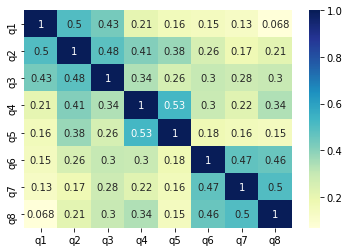

In [19]:
import seaborn as sns
sns.heatmap(df_tutorial5.corr(), cmap="YlGnBu", annot=True)

**Exercice 5: based on the statistics, can you see a pattern and group variables as the proposed three factors model? Find correlations between each question in the dataset**

In [25]:
# perform a pearson correlation test
from scipy import stats
X = df_tutorial5['q1']
Y = df_tutorial5['q3']
rho, p_value = stats.pearsonr(X, Y)
print(f'correlation coefficient: {round(rho,4)}')
print(f'p value: {round(p_value,4)}')



correlation coefficient: 0.434
p value: 0.0


In [21]:
df_tutorial5.corrwith(df_tutorial5['q1']).sort_values(ascending=False)

q1    1.000000
q2    0.503568
q3    0.434025
q4    0.209179
q5    0.155458
q6    0.147776
q7    0.126557
q8    0.067692
dtype: float64

### Reliability test with Cronbach's alpha


The next step is reliability analysis through Cronbach's Alpha.

**What does Cronbach's Alpha measures?**

Using scales to measure constructs is widespread in the social sciences and beyond.  To support the application of these scales, researchers and practitioners need to show evidence of appropriate reliability.  Many different types of reliability exist, but internal consistency reliability is perhaps the most popular.  Even yet, many metrics exist to provide evidence of internal consistency reliability, but Cronbach’s alpha is perhaps the most popular of these.  For this reason, I provide a guide below of how to calculate Cronbach’s alpha in Python.

Whenever we use multiple items/questions to measure a **latent (non-observable) construct**, we call this set of items/questions a **scale**. For example, in this usecase, we want to find out our students' attitudes towards tolerance. Since we can't measure attitudes directly simply asking them "how tolerance you are?" due to different definition and understanding of tolerance, we should create a construct that attempts to measure same things. 

For our usecase, we don't want to deal with each of these 8 variables separately. Rather we want to develop composite measures that combine these variables. Let's start by developing three composite measures as indicated in [1] theoretical framework.

Each group has three (or two) variables. We need to determine if these three variables are internally consistent. This is basically a question of reliability. A commonly used measure of reliability is Cronbach's Alpha. 


To make sure we did a good job at constructing these scales, we need to use some quality measures. In general, we want to test a scale for validity and reliability. A scale is valid if it actually measures the construct it’s supposed to measure. It’s reliable if it measures the same thing every time.

**How does Cronbach's Alpha help?**


Cronbach's Alpha tell us how **internally consistent** is our scale. It is the degree to which all observed variables in a scale measure the same construct. If q1, q2, q3 all contribute to measuring the same thing. If these items/questions are correlated I would expect Cronbach alpha to be high. Items that don't really seem to correlate would then be with low Cronbach's Alpha. It helps to answer the following question:

> _Do the items I picked to measure a construct line up?_

**How to interpret Cronbach's Alpha?**

Cronbach's Alpha statistic (α) varies from 0 and 1. Low values indicate low consistency and high values indicate high consistency.  Alpha increases as the number of items increases and as the correlation between items increases.  One rule of thumb that is often used is that an Alpha of .70 or higher is necessary to indicate reliability although some feel that a higher value is required. See the table below:


| Cronbach’s   Alpha | Internal consistency | 
|:------------------:|:--------------------:|
| 0.9 ≤ α            | Excellent            |
| 0.8 ≤ α   < 0.9    | Good                 |
| 0.7 ≤ α   < 0.8    | Acceptable           |
| 0.6 ≤ α   < 0.7    | Questionable         |
| 0.5 ≤ α   < 0.6    | Poor                 |
| α < 0.5            | Unacceptable         |

**How to calculate Cronbach's Alpha in python?**

To calculate Cronbach’s Alpha in pythonfor the survey responses, we will use the `cronbach_alpha()` function from the [pingouin](https://pingouin-stats.org/) library.

However, there is also another approach to calculating Cronbach alpha that is much better suited for data science. As you notice, none of the common data science libraries like NumPy, Pandas, or Sklearn feature Cronbach alpha measures. This [article](https://towardsdatascience.com/cronbachs-alpha-theory-and-application-in-python-d2915dd63586) will show you exactly how to create your own function. However, there is a reason I haven’t told you yet. The approach you will learn today is much more intuitive and easier to understand.  

### Calculate Cronbach's Alpha - One Overall factor variables

In [12]:
# follow the installation instructions here:
# https://pingouin-stats.org/index.html

In [27]:
import pingouin as pg

Try to read the [official documentation](
https://pingouin-stats.org/generated/pingouin.cronbach_alpha.html) and figure out how this function works: 

Tip: to calculate a Cronbach’s alpha, our syntax is very simple.  We just need to type in: `pg.cronbach_alpha(data= #name) `.  Then we enter the `#name` of our data, followed by closing our parenthesis. Then press enter.

In [28]:
pg.cronbach_alpha(data = df_tutorial5)

(0.7682185310118436, array([0.708, 0.82 ]))

Cronbach’s Alpha turns out to be 0.708.

The 95% confidence interval for Cronbach’s Alpha is also given: [0.708, 0.82].

In [20]:
# Change the default confidence interval from 95% to 90%. What does it mean?
# tips we can specify a different confidence level using the ci argument

In [29]:
pg.cronbach_alpha(data = df_tutorial5, ci = .99)

(0.7682185310118436, array([0.686, 0.835]))

The value for Cronbach’s Alpha remains the same, but the confidence interval is much wider since we used a higher confidence level.

The previous exercice calculated the Cronbach’s alpha of each 8 variable in the dataset together. This can be helpful if your dataset only includes a single factor, but according to our theoretical model [1], we typically include three factors and we want to calculate a separate Cronbach’s alpha for each of them. 

**So what do we do next?**

Well, we can add a little bit of code that can separate our factors in the dataset.  To do this, we must first know which variables are included for which factor.  For instance, we must know that q1, q2, and q3 are grouped in AcceptanceFactor, whereas variables q4, q5, must be in RespectFactor and the remaining q6, q7, q8 are in AppreciationFactor.


### Calculate Cronbach's Alpha - Three factor variables

To separete our variables in three factors we need to add some additional code as following:

In [38]:
# create a variable named AcceptanceFactor containing q1, q2,q3
AcceptanceFactor = df_tutorial5[['q1','q2','q3']]
# calculate the cronbach alpha for this factor
pg.cronbach_alpha(data = AcceptanceFactor)

(0.7300924360987142, array([0.646, 0.797]))

`AcceptanceFactor` now refers to the three variables that represent out Factor that we want to use to calculate our Cronbach's Alpha.

In [41]:
# exercice calculate cronbach alpha for the two other factors


In [46]:
# solution
RespectFactor = df_tutorial5[['q4','q5']]
AppreciationFactor = df_tutorial5[['q6','q7','q8']]


In [45]:
# solution
print(f'Cronbach Alpha for RespectFactor:', pg.cronbach_alpha(data = RespectFactor))
print(f'Cronbach Alpha for AppreciationFactor:', pg.cronbach_alpha(data = AppreciationFactor))

Cronbach Alpha for RespectFactor: (0.6776686816901887, array([0.555, 0.766]))
Cronbach Alpha for AppreciationFactor: (0.7329188147683439, array([0.649, 0.799]))


You are looking for a score of over .7 for high
internal consistency. In this case, α = .0.74, which shows the questionnaire is reliable.

**So... what do our findings tell us?**

In interpreting a scale’s α coefficient, remember that a high α is both a function of the correlations among items and the number of items in the analysis, so a high α coefficient isn’t in and of itself the mark of a “good” or reliable set of items; you can often increase the α coefficient simply by increasing the number of items in the analysis. In fact, because highly correlated items will also produce a high α coefficient, if it’s very high (i.e., > 0.95), you may be risking redundancy in your scale items.


When writing up your results you need to report the result of the Cronbach’s alpha, as well as referring to any individual items that may be problematic. This should be done with the correct statistics and a meaningful interpretation in plain English. A Cronbach’s alpha is reported using the small Greek letter alpha:

> _A reliability analysis was carried out on the tolerance questionnarie comprising 8 items. The results showed that all of the factors presented values higher than 0.7, which indicated the reliability of the proposed instrument. The only item that obtained a value under 0.7, but close to 0.6 is RespectFactor, but can be regarded as satisfactory._

---
